# Analysis of the Hotel Booking

### The goal of this project is to predict if a guest will actually come or he will cancel the resrvation,
### it will be usefull for hotels if they have model like this to offer more rooms or take a retainer from the client before the resrvation.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
Data = pd.read_csv(r'C:\Users\mmm--\Desktop\T5\hotel_bookings.csv')
Data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
Data.shape

(119390, 32)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
Data.index

RangeIndex(start=0, stop=119390, step=1)

#### making sure all columns are unique

In [14]:
len(Data.columns.unique())

32

In [15]:
Data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [16]:
Data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### There are 4 columns have empty values

In [17]:
Data.columns[Data.isna().any()].unique()

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [18]:
print ("Number of columns have empty values :")
len(Data.columns[Data.isna().any()].unique())

Number of columns have empty values :


4

#### i'm gonna look more deeper into these four columns

In [19]:
print("Number of empty values in children column: ", Data['children'].isnull().sum())
print("Percentage： ", Data['children'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in children column:  4
Percentage：  0.003350364352123293


In [20]:
print("Number of empty values in country column: ", Data['country'].isnull().sum())
print("Percentage： ", Data['country'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in country column:  488
Percentage：  0.40874445095904177


In [21]:
print("Number of empty values in agent column: ", Data['agent'].isnull().sum())
print("Percentage： ", Data['agent'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in agent column:  16340
Percentage：  13.686238378423655


In [22]:
print("Number of empty values in company column: ", Data['company'].isnull().sum())
print("Percentage： ", Data['company'].isnull().sum() / Data.shape[0] * 100)

Number of empty values in company column:  112593
Percentage：  94.30689337465449


#### company column show that is 94% of columns are missing so i can't use it any more i'll drop it

In [23]:
Data = Data.drop(['company'], axis =1)

#### Making sure the company column was deleted

In [24]:
Data.shape

(119390, 31)

### What pepoles prefer to book resort hotel or city hotel ( give me a precentage ) ?
#### as we see most of the pepole (%66) prefer to book a city hotel bcause the resort usually more expensive 

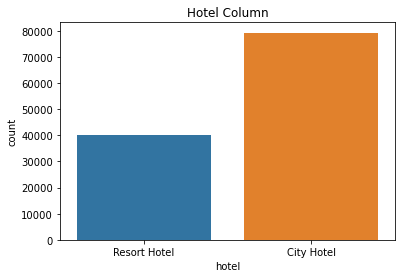

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

In [25]:
plt.title("Hotel Column")
sns.countplot(x=Data['hotel'])
plt.show()
Data['hotel'].value_counts() / Data.shape[0] * 100

### What is the perecntage of pepole who's cancel there reservation ?
#### as we see here (0) means not canceled in %62 which means most of the pepole not canceled

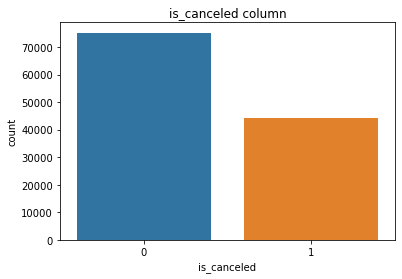

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

In [26]:
plt.title("is_canceled column")
sns.countplot(x=Data['is_canceled'])
plt.show()
Data['is_canceled'].value_counts() / Data.shape[0] * 100

### which are the most busy month ?
#### it shows the must pepoles booked in August

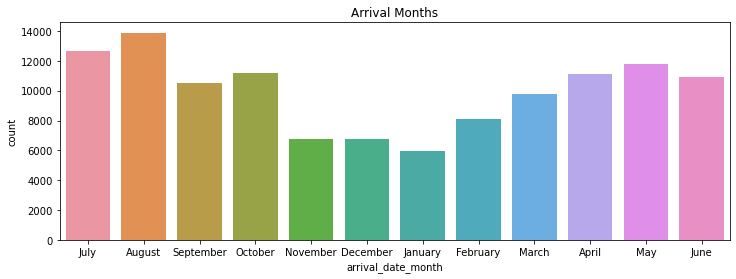

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [27]:
plt.figure(figsize=(12, 4))
plt.title("Arrival Months")
sns.countplot(x=Data['arrival_date_month'])
plt.show()
Data['arrival_date_month'].value_counts()